# The TLS206_PERSON Table

Welcome to a comprehensive exploration of one of the key tables in the PATSTAT database: the Person Table (``TLS206_PERSON``). This table is essential for providing detailed information about individuals and organisations involved in patent applications, whether as inventors or applicants. This table includes key data such as ``PERSON_ID`` (a unique identifier), name, address, country code, and sector classification (e.g., academia, industry).

By linking ``TLS206_PERSON`` with other tables like ``TLS207_PERS_APPLN``, we can enrich patent application data with **personal details**, offering insights into who is involved in innovation, where they are located, and which sectors they represent. This allows for a comprehensive analysis of the global distribution of innovation and the contributions of key players in various industries.

The country code and sector classification fields enable **geographic and sector-based analysis**, helping to identify the origins of innovations and which industries or institutions are most active. For example, understanding the role of academic institutions versus corporate entities in patent filings is valuable for policymakers and businesses.

Furthermore, the table includes **standardised name forms**, such as ``DOC_STD_NAME`` and ``HAN_HARMONIZED``, which resolve ambiguities when there are variations in names across different filings. This helps ensure accurate tracking of contributions across multiple applications.

In conclusion, ``TLS206_PERSON`` is crucial for understanding the people and organisations driving innovation. By analysing this data, we can identify key contributors, their geographic and sector affiliations, and their roles in the patenting process.

In [1]:
from epo.tipdata.patstat import PatstatClient
from epo.tipdata.patstat.database.models import TLS206_PERSON, TLS207_PERS_APPLN, TLS201_APPLN
from sqlalchemy import func, case, select, and_ 

# Initialise the PATSTAT client
patstat = PatstatClient(env='TEST')

# Access ORM
db = patstat.orm()

## Key Fields in the ``TLS206_PERSON`` Table

### PERSON_ID (Primary Key)

In ``TLS207_PERS_APPLN``, the ``PERSON_ID`` is used to connect individuals to their respective roles (inventor or applicant) in patent applications. By joining ``TLS206_PERSON`` with ``TLS207_PERS_APPLN`` using ``PERSON_ID`` as the linking field, we can enrich our analysis by combining patent application data with detailed personal information, such as names, addresses, and sectors. This reliable linking is vital for analysing who drives innovation within the patent landscape.

The ``PERSON_ID`` serves as the primary key in the ``TLS206_PERSON`` table, uniquely identifying each individual or organisation involved in patent applications. This unique identifier ensures consistency across different patent records, allowing accurate linking of personal data with corresponding roles in patent filings.

The connection between ``TLS201_APPLN``, ``TLS207_PERS_APPLN``, and ``TLS206_PERSON`` is essential for understanding how patent applications link to the individuals or organisations behind them. The ``TLS201_APPLN`` table contains core information about each patent application, with ``APPLN_ID`` as the unique identifier for each application. This identifier is then used in ``TLS207_PERS_APPLN``, which bridges patent applications with people involved, such as inventors and applicants, through the ``PERSON_ID`` field.

``TLS207_PERS_APPLN`` records the many-to-many relationships between individuals and patent applications, indicating whether a person is an applicant or inventor through the ``APPL_SEQ_NR`` and ``INVT_SEQ_NR`` fields. Finally, ``TLS206_PERSON`` contains detailed personal data, including names, addresses, and country codes, which can be linked to patent applications via ``PERSON_ID``. This connection enriches patent data with personal details, facilitating a deeper analysis of who contributes to patent filings and innovation.

By joining these tables, we gain a comprehensive view of patent applications and the people or organisations behind them, along with insights into their roles, locations, and sectors.

In [2]:
q = db.query(
    TLS207_PERS_APPLN.appln_id,
    TLS201_APPLN.appln_nr,  
    TLS206_PERSON.person_id,
    TLS206_PERSON.person_name
).join(
    TLS207_PERS_APPLN, TLS206_PERSON.person_id == TLS207_PERS_APPLN.person_id  # Join on person_id
).join(
    TLS201_APPLN, TLS207_PERS_APPLN.appln_id == TLS201_APPLN.appln_id  # Join on appln_id
)

res = patstat.df(q)

res

,appln_id,appln_nr,person_id,person_name
0,57025341,2008078434,40585895,"LEDERBUCH, PAVEL"
1,275544314,55538009,45175768,"Urbanowicz, John"
2,381603477,201113374528,11243775,"Myhrvold, Nathan P."
3,9163373,19494176,20649701,"SCHULZE,HORST,DD"
4,55068766,3729008,10779314,"Robinson, Seth M."
...,...,...,...,...
1325921,52691972,67755903,6552866,"Dame, Mark Edward"
1325922,49151418,26750488,7243397,"Yamada, Toshikazu"
1325923,54049442,89886792,10261899,"Rathjen, Jr., John C."
1325924,409563943,201320168773,43609631,ZHAO YUANLEI


This demonstrates how ``PERSON_ID`` **links** individuals or organisations to specific patent applications through ``TLS207_PERS_APPLN`` and ``TLS201_APPLN``.

## Name and Address Delivered by the Offices

The ``TLS206_PERSON`` table provides **detailed information** about the individuals and organisations involved in patent applications. The fields such as ``PERSON_NAME``, ``PERSON_NAME_ORIG_LG``, ``PERSON_ADDRESS``, and ``PERSON_CTRY_CODE`` are critical for identifying applicants and inventors, and for analysing geographic and linguistic trends. The DOCDB standardised name system includes a unique identifier (``DOC_STD_NAME_ID``) and a uniform name (``DOC_STD_NAME``) to ensure consistency across records. Similarly, the PATSTAT system features the ``PSN_ID`` for unique identification and the ``PSN_NAME`` for **consistent naming**, aiding in data aggregation and analysis.
By joining these fields with the ``TLS207_PERS_APPLN`` table, we can gain deeper insights into the diversity and location of contributors to the patent process.

### PERSON_NAME

The name of the person or organisation as delivered by the office.

In [3]:
q = db.query(
    TLS207_PERS_APPLN.appln_id,
    TLS201_APPLN.appln_nr,
    TLS206_PERSON.person_id,
    TLS206_PERSON.person_name    
).join(
    TLS207_PERS_APPLN, TLS206_PERSON.person_id == TLS207_PERS_APPLN.person_id
).join(
    TLS201_APPLN, TLS207_PERS_APPLN.appln_id == TLS201_APPLN.appln_id
).filter(
    TLS206_PERSON.person_name != None          # Filter out rows where person_name is None
).order_by(
    TLS206_PERSON.person_name 
)

res = patstat.df(q)

res

,appln_id,appln_nr,person_id,person_name
0,23871673,0100005,29372236,&CCARON
1,487421422,201710680800,58089751,"&quotGUANGZHOU POWER SUPPLY CO., LTD.&quot"
2,478302400,201620941863,58137100,"'AGTS (Shanghai) Transmission Technology Co., ..."
3,47539282,10394336,23321210,'ARTHEL' (SOCIETE D'EXPLOITATION DES BREVETS J...
4,545369628,4927994,80710576,'AZOVSTAL' METALLURGICAL INTEGRATED WORKS
...,...,...,...,...
1325856,412467118,201280012045,63097179,ＴＨＫ株式会社
1325857,341730629,2011129277,63097179,ＴＨＫ株式会社
1325858,540303313,2019084361,63097179,ＴＨＫ株式会社
1325859,7486359,96192305,85428825,��ǿ�ά��


Connections between individuals and patent applications can be seen, shedding light on the collaborative nature of innovation. Repeating application numbers in the results indicate multiple contributors to the same application, reflecting the teamwork often involved in the patenting process.

### PERSON_NAME_ORIG_LG

The name in its original language (could include non-Latin characters).

In [4]:
q = db.query(
    TLS207_PERS_APPLN.appln_id,
    TLS201_APPLN.appln_nr,
    TLS206_PERSON.person_id,
    TLS206_PERSON.person_name,
    TLS206_PERSON.person_name_orig_lg 
).join(
    TLS207_PERS_APPLN, TLS206_PERSON.person_id == TLS207_PERS_APPLN.person_id  # Join to look at precisely one person
).join(
    TLS201_APPLN, TLS207_PERS_APPLN.appln_id == TLS201_APPLN.appln_id
).filter(
    TLS206_PERSON.person_name != TLS206_PERSON.person_name_orig_lg  # Filter for names different from original language
).order_by(
    TLS206_PERSON.person_name  # Order by person name
)

res = patstat.df(q)

res

,appln_id,appln_nr,person_id,person_name,person_name_orig_lg
0,487421422,201710680800,58089751,"&quotGUANGZHOU POWER SUPPLY CO., LTD.&quot",广州供电局有限公司
1,478302400,201620941863,58137100,"'AGTS (Shanghai) Transmission Technology Co., ...",捷颂（上海）传动科技有限公司
2,545369628,4927994,80710576,'AZOVSTAL' METALLURGICAL INTEGRATED WORKS,МЕТАЛУРГІЙНИЙ КОМБІНАТ 'АЗОВСТАЛЬ'
3,478072824,201510686160,59279255,'CEPRI Saipu Examination and Authentification ...,中电赛普检验认证（北京）有限公司
4,478080860,201510706131,59279255,'CEPRI Saipu Examination and Authentification ...,中电赛普检验认证（北京）有限公司
...,...,...,...,...,...
636816,578238616,202163,69642344,ČESKÉ VYSOKÉ UČENÍ TECHNICKÉ V PRAZE,ÄŚeskĂ© vysokĂ© uÄŤenĂ­ technickĂ© v Praze
636817,9052443,2006123,63723275,ČVUT V PRAZE - FAKULTA STROJNÍ,ÄŚVUT v Praze - Fakulta strojnĂ­
636818,472822792,2015690,67903495,"ČVUT V PRAZE, FAKULTA STROJNÍ","ÄŚVUT v Praze, Fakulta strojnĂ­"
636819,512443702,201935850,88302151,"Červenka, Vratislav","ÄŚervenka, Vratislav"


This is particularly useful for names that are written in non-Latin scripts or alphabets (.g., Cyrillic for Russian, Kanji or Hiragana for Japanese, Arabic...).

### DOCDB Standardised Name

The **DOCDB standardised name** refers to a standardised version of the applicant or inventor's name. This **standardisation** is performed by the European Patent Office (EPO) to ensure consistency in naming across different patent applications and documents, especially since names can vary due to differences in language, formatting, or abbreviations.

- ``DOC_STD_NAME_ID``: This is the unique identifier for the DOCDB standardised name. It helps differentiate between different standard names in the database.

- ``DOC_STD_NAME``: This is the actual standardised name of the person or organisation. It provides a uniform version of the name as recorded in the DOCDB (EPO's worldwide patent database). For example, an organisation might be listed under multiple variations of its name in different countries, but the ``DOC_STD_NAME`` field would unify these under one consistent name.

### PATSTAT Standardised Name

The PATSTAT standardised name refers to another method of standardising names for applicants and inventors to ensure **consistency** and facilitate easier data analysis. This standardisation may differ from the DOCDB standardisation. Here’s a breakdown of the relevant fields related to the PATSTAT standardised name:

- ``PSN_ID``: This is the unique identifier for the **PATSTAT standardised name**. It allows users to reference specific standardised names within the database, ensuring that each entry can be uniquely identified.

- ``PSN_NAME``: This is the **standardised name** of the person or organisation as recognised in the PATSTAT database. It provides a consistent version of the name, which is particularly useful for aggregating data and performing analyses where variations in naming might otherwise complicate results.

- ``PSN_LEVEL``: The `PSN_LEVEL` field serves as an indicator of the effort invested in assigning a standardised psn_name to the corresponding individual name. The levels are defined as follows:

    - **Level 1**: This indicates that only an automated script has been applied to correct the syntax and clean up the name. This process typically involves basic formatting adjustments.

    - **Level 2**: This level signifies that human involvement was part of the assignment process for the ``PSN_NAME``. The specifics of this process can be found in the separate methodology documentation.
 
    - **Level 0**: This level indicates that the person records have not undergone significant processing, except for minor adjustments such as capitalising the name and possibly removing extra spaces and punctuation.

The primary purpose of the ``PSN_LEVEL`` is to provide a quality assessment of the ``PSN_NAME``. It does not serve any analytical purpose regarding patent data.

In [5]:
q = db.query(
    TLS207_PERS_APPLN.appln_id,
    TLS201_APPLN.appln_nr,
    TLS206_PERSON.person_id,
    TLS206_PERSON.person_name,
    TLS206_PERSON.person_name_orig_lg,
    TLS206_PERSON.doc_std_name_id,
    TLS206_PERSON.doc_std_name,
    TLS206_PERSON.psn_id,
    TLS206_PERSON.psn_name,
    TLS206_PERSON.psn_level    
).join(
    TLS207_PERS_APPLN, TLS206_PERSON.person_id == TLS207_PERS_APPLN.person_id  
).join(
    TLS201_APPLN, TLS207_PERS_APPLN.appln_id == TLS201_APPLN.appln_id
).order_by(
    TLS206_PERSON.person_id  
)

res = patstat.df(q)

res

,appln_id,appln_nr,person_id,person_name,person_name_orig_lg,doc_std_name_id,doc_std_name,psn_id,psn_name,psn_level
0,17342174,98917166,1,Nokia Corporation,Nokia Corporation,1,NOKIA CORP,23782051,NOKIA CORPORATION,2
1,16049957,03732975,21,Koninklijke Philips Electronics N.V.,Koninklijke Philips Electronics N.V.,17,KONINKL PHILIPS ELECTRONICS NV,25555175,PHILIPS ELECTRONICS,2
2,16227388,05703021,21,Koninklijke Philips Electronics N.V.,Koninklijke Philips Electronics N.V.,17,KONINKL PHILIPS ELECTRONICS NV,25555175,PHILIPS ELECTRONICS,2
3,17095752,95108893,57,BAYER AG,BAYER AG,51,BAYER AG,2205226,BAYER,2
4,17304418,98116160,62,HONDA GIKEN KOGYO KABUSHIKI KAISHA,HONDA GIKEN KOGYO KABUSHIKI KAISHA,52,HONDA MOTOR CO LTD,13072217,HONDA MOTOR COMPANY,2
...,...,...,...,...,...,...,...,...,...,...
1325921,588188432,2023061690,92514654,"MAR, David Buck","MAR, David Buck",41705939,MAR DAVID BUCK,192514654,"MAR, David Buck",0
1325922,602198027,2022012606,92514744,MIGNACCA Richard,MIGNACCA Richard,36870687,MIGNACCA RICHARD,192514744,MIGNACCA Richard,0
1325923,600772140,2023019662,92514772,"MOHAMMAD, Mostak","MOHAMMAD, Mostak",39080479,MOHAMMAD MOSTAK,192514772,"MOHAMMAD, Mostak",0
1325924,604333655,2022048468,92515469,"VADIPOUR, Morteza","VADIPOUR, Morteza",3268625,VADIPOUR MORTEZA,192515469,"VADIPOUR, Morteza",0


### PERSON_ADDRESS

The address of the person or organisation.

In [6]:
q = db.query(
    TLS207_PERS_APPLN.appln_id,
    TLS201_APPLN.appln_nr,
    TLS201_APPLN.appln_auth,
    TLS206_PERSON.person_id,
    TLS206_PERSON.person_name,
    TLS206_PERSON.person_address
).join(
    TLS207_PERS_APPLN, TLS206_PERSON.person_id == TLS207_PERS_APPLN.person_id
).join(
    TLS201_APPLN, TLS207_PERS_APPLN.appln_id == TLS201_APPLN.appln_id
).filter(
    TLS206_PERSON.person_address == None  # Filter rows where person_address is None
).order_by(
    TLS206_PERSON.person_id
)


res = patstat.df(q)

res

,appln_id,appln_nr,appln_auth,person_id,person_name,person_address
0,17095752,95108893,EP,57,BAYER AG,None
1,17410318,99402921,EP,80,L'OREAL,None
2,55537,07013724,EP,220,SIEMENS AKTIENGESELLSCHAFT,None
3,16233784,05716935,EP,220,SIEMENS AKTIENGESELLSCHAFT,None
4,16383817,07012714,EP,220,SIEMENS AKTIENGESELLSCHAFT,None
...,...,...,...,...,...,...
1247674,588188432,2023061690,WO,92514654,"MAR, David Buck",None
1247675,602198027,2022012606,MX,92514744,MIGNACCA Richard,None
1247676,600772140,2023019662,WO,92514772,"MOHAMMAD, Mostak",None
1247677,604333655,2022048468,WO,92515469,"VADIPOUR, Morteza",None


It can be observed that many individuals, either as applicants or inventors, do not have a specified address. Therefore, it would be beneficial to conduct a query that counts the number of individuals **lacking** an address, categorised by application authority. This analysis is particularly relevant, as there may be other fields that could also be missing, and considering these gaps in data could provide a more comprehensive understanding of the information quality associated with patent filings. Additionally, for conducting in-depth analysis, it is useful to retrieve data regarding the origin of the individuals involved in the applications and their engagement with the invention. 

It may be interesting to explore how these missing addresses are distributed **across different application authorities**, given that these data points are closely tied to the bureaucratic process. Understanding the distribution of missing addresses could reveal insights into potential inefficiencies or gaps in the data collection practices of specific authorities as well as regulatory compliance. 

In [7]:
application_authority_counts_query = db.query(
    TLS201_APPLN.appln_auth, 
    func.count(func.distinct(TLS206_PERSON.person_id)).label('num_missing_addresses')  # Count distinct person_id with None address
).join(
    TLS207_PERS_APPLN, TLS206_PERSON.person_id == TLS207_PERS_APPLN.person_id 
).join(
    TLS201_APPLN, TLS207_PERS_APPLN.appln_id == TLS201_APPLN.appln_id  
).filter(
    TLS206_PERSON.person_address == None  # Filter for records with None addresses
).group_by(
    TLS201_APPLN.appln_auth  # Group by application authority
).order_by(
    func.count(func.distinct(TLS206_PERSON.person_id)).desc()  
)

application_authority_counts_res = patstat.df(application_authority_counts_query)

application_authority_counts_res

,appln_auth,num_missing_addresses
0,CN,316363
1,US,134153
2,WO,44678
3,EP,35678
4,JP,28169
...,...,...
75,KZ,4
76,SM,3
77,YU,2
78,NI,2


The results of this query reveal which application authorities are most deficient in providing the addresses of individuals and entities.

It would be interesting to analyse how much these missing data affect the **overall records** of each application authority. If there is an application authority with numerous missing data, it may not be significant if the total number of applications they handle is large, especially when considering the registered individuals in that authority. To understand this, we can compare the total number of individuals managed by each application authority with the number of missing data.

We have already examined the number of missing data points per application authority, and now we will run a similar query that looks at the total persons' records. These results will then be used as subqueries for a main query that calculates the percentage of missing data for each application authority.

In [8]:
application_authority_tot_query = db.query(
    TLS201_APPLN.appln_auth,  
    func.count(func.distinct(TLS206_PERSON.person_id)).label('total_persons')  # Count distinct person_id with None address
).join(
    TLS207_PERS_APPLN, TLS206_PERSON.person_id == TLS207_PERS_APPLN.person_id  
).join(
    TLS201_APPLN, TLS207_PERS_APPLN.appln_id == TLS201_APPLN.appln_id  
).group_by(
    TLS201_APPLN.appln_auth  
).order_by(
    func.count(func.distinct(TLS206_PERSON.person_id)).desc()  
)

application_authority_tot_res = patstat.df(application_authority_tot_query)

application_authority_tot_res

,appln_auth,total_persons
0,CN,316366
1,US,153063
2,WO,45034
3,EP,40326
4,JP,28169
...,...,...
75,EE,4
76,SM,3
77,YU,2
78,NI,2


In [9]:
application_authority_counts_query_sub = application_authority_counts_query.subquery()
application_authority_tot_query_sub = application_authority_tot_query.subquery()

In [10]:
combined_query = db.query(
    application_authority_tot_query_sub.c.appln_auth,  
    application_authority_counts_query_sub.c.num_missing_addresses,  
    application_authority_tot_query_sub.c.total_persons,  
    (application_authority_counts_query_sub.c.num_missing_addresses / application_authority_tot_query_sub.c.total_persons * 100).label('percentage_none_address')  # Calculate percentage of None addresses
).outerjoin(  # Left outer join ensures all application authorities are included
    application_authority_counts_query_sub,
    application_authority_counts_query_sub.c.appln_auth == application_authority_tot_query_sub.c.appln_auth  
).order_by((application_authority_counts_query_sub.c.num_missing_addresses / application_authority_tot_query_sub.c.total_persons * 100).desc()
).limit(10)   # Select top 10

combined_res = patstat.df(combined_query)
combined_res['percentage_none_address'] = combined_res['percentage_none_address'].astype(int)

combined_res

,appln_auth,num_missing_addresses,total_persons,percentage_none_address
0,EA,277,277,100
1,KR,17438,17438,100
2,AU,3951,3951,100
3,UA,272,272,100
4,ES,5645,5645,100
5,TW,3172,3172,100
6,NO,361,361,100
7,LU,230,230,100
8,FR,3298,3298,100
9,JP,28169,28169,100


The **percentage** for certain key application authorities is quite high, meaning that this data cannot be reliably used if these application authorities are taken into account.

### PERSON_CTRY_CODE

The country code of the person or organisation.

Since missing data has been identified, it is worth conducting a similar analysis focusing on the person’s country code. However, we might expect these data to be more readily available compared to personal addresses.

In [11]:
q = db.query(
    TLS207_PERS_APPLN.appln_id,
    TLS201_APPLN.appln_nr,
    TLS201_APPLN.appln_auth,
    TLS206_PERSON.person_id,
    TLS206_PERSON.person_name,
    TLS206_PERSON.person_address, 
    TLS206_PERSON.person_ctry_code    
).join(
    TLS207_PERS_APPLN, TLS206_PERSON.person_id == TLS207_PERS_APPLN.person_id 
).join(
    TLS201_APPLN, TLS207_PERS_APPLN.appln_id == TLS201_APPLN.appln_id 
).order_by(
    TLS206_PERSON.person_name
)

res = patstat.df(q)

res

,appln_id,appln_nr,appln_auth,person_id,person_name,person_address,person_ctry_code
0,7486359,96192305,CN,263,None,None,
1,7486359,96192305,CN,263,None,None,
2,7486359,96192305,CN,263,None,None,
3,7486359,96192305,CN,263,None,None,
4,7486359,96192305,CN,263,None,None,
...,...,...,...,...,...,...,...
1325921,412467118,201280012045,CN,63097179,ＴＨＫ株式会社,None,
1325922,341730629,2011129277,JP,63097179,ＴＨＫ株式会社,None,
1325923,540303313,2019084361,JP,63097179,ＴＨＫ株式会社,None,
1325924,7486359,96192305,CN,85428825,��ǿ�ά��,None,


Similarly, there are many missing values in the person country code.

In [12]:
application_authority_country_counts_missing_query = db.query(
    TLS201_APPLN.appln_auth,  # Application authority
    func.count(func.distinct(TLS206_PERSON.person_id)).label('num_missing_country_codes')  # Count distinct person_id with empty country codes
).join(
    TLS207_PERS_APPLN, TLS206_PERSON.person_id == TLS207_PERS_APPLN.person_id  
).join(
    TLS201_APPLN, TLS207_PERS_APPLN.appln_id == TLS201_APPLN.appln_id  
).filter(
    TLS206_PERSON.person_ctry_code == '  '  # Filter for records with missing country codes (empty spaces)
).group_by(
    TLS201_APPLN.appln_auth  
).order_by(
    func.count(func.distinct(TLS206_PERSON.person_id)).desc()  
)

application_authority_country_counts_res = patstat.df(application_authority_country_counts_missing_query)

application_authority_country_counts_res

,appln_auth,num_missing_country_codes
0,CN,306948
1,JP,28136
2,US,7931
3,KR,4869
4,ES,4139
5,AU,3041
6,GB,1735
7,DE,1514
8,WO,965
9,RU,766


In light of these two fields, we can compare the absence of addresses with that of country codes present in each application authority.

In [13]:
country_code_count_query = db.query(
    TLS201_APPLN.appln_auth,  
    func.count(func.distinct(TLS206_PERSON.person_id)).label('total_persons')  # Count distinct person_id with missing country code
).join(
    TLS207_PERS_APPLN, TLS206_PERSON.person_id == TLS207_PERS_APPLN.person_id  
).join(
    TLS201_APPLN, TLS207_PERS_APPLN.appln_id == TLS201_APPLN.appln_id  
).group_by(
    TLS201_APPLN.appln_auth  
).order_by(
    func.count(func.distinct(TLS206_PERSON.person_id)).desc()  
)

country_code_count_res = patstat.df(country_code_count_query)

country_code_count_res

,appln_auth,total_persons
0,CN,316366
1,US,153063
2,WO,45034
3,EP,40326
4,JP,28169
...,...,...
75,EE,4
76,SM,3
77,YU,2
78,NI,2


In [14]:
country_code_count_query_sub = country_code_count_query.subquery()
application_authority_country_counts_query_sub = application_authority_country_counts_missing_query.subquery()

In [15]:
combined_country_code_query = db.query(
    country_code_count_query_sub.c.appln_auth,  
    application_authority_country_counts_query_sub.c.num_missing_country_codes,  
    (application_authority_country_counts_query_sub.c.num_missing_country_codes / country_code_count_query_sub.c.total_persons * 100).label('percentage_missing_country_codes')  
).outerjoin( 
    application_authority_country_counts_query_sub,
    application_authority_country_counts_query_sub.c.appln_auth == country_code_count_query_sub.c.appln_auth  
).order_by(
    (application_authority_country_counts_query_sub.c.num_missing_country_codes / country_code_count_query_sub.c.total_persons * 100).desc()
).limit(10)   # Select top 10

combined_country_code_res = patstat.df(combined_country_code_query)

combined_country_code_res['num_missing_country_codes'] = combined_country_code_res['num_missing_country_codes'].fillna(0).astype(int) # necessary for the outerjoin
combined_country_code_res['percentage_missing_country_codes'] = combined_country_code_res['percentage_missing_country_codes'].fillna(0).astype(int)

combined_country_code_res

,appln_auth,num_missing_country_codes,percentage_missing_country_codes
0,KZ,4,100
1,JP,28136,99
2,CN,306948,97
3,NZ,289,96
4,HK,120,81
5,AU,3041,76
6,ES,4139,73
7,IT,430,69
8,IE,7,63
9,EG,4,57


Incomplete country codes can complicate analyses related to the geographical distribution of patent applicants or inventors, making it harder to assess contributions from different countries. Identifying where these data gaps exist is useful for addressing potential inconsistencies. 

### Analysis of Missing Data in Name and Address Fields

The missing data related to individuals makes it particularly relevant to examine other categories, especially those that may be significant for future analyses.

In [16]:
# Query for missing names 
missing_names_query = db.query(
    TLS206_PERSON.person_id
).filter(TLS206_PERSON.person_name == None)

missing_names_res = patstat.df(missing_names_query)

# Query for missing addresses 
missing_addresses_query = db.query(
    TLS206_PERSON.person_id
).filter(TLS206_PERSON.person_address == None)

missing_addresses_res = patstat.df(missing_addresses_query) 

#Query for missing country codes 
missing_country_query = db.query(
    TLS206_PERSON.person_id
).filter(TLS206_PERSON.person_ctry_code == '  ')

missing_country_res = patstat.df(missing_country_query) 

The purpose of these queries is to identify and gather the ``PERSON_IDs`` of individuals who are missing certain key attributes, which can help assess the completeness of the dataset and potentially inform data quality improvement efforts.

After executing these queries, one might consider analysing the intersections of these missing attributes to uncover patterns, such as whether certain application authorities are more likely to have missing data, or if specific types of entities (individuals vs. corporations) show more incomplete records. This analysis could inform targeted efforts to improve data completeness and reliability.

In [17]:
import pandas as pd

# Find person_ids that are missing names and addresses
missing_names_addresses = pd.merge(missing_names_res, missing_addresses_res, on='person_id', how='inner', suffixes=('_name', '_address'))

# Find person_ids that are missing names and country codes
missing_names_country = pd.merge(missing_names_res, missing_country_res, on='person_id', how='inner', suffixes=('_name', '_country'))

# Find person_ids that are missing addresses and country codes
missing_addresses_country = pd.merge(missing_addresses_res, missing_country_res, on='person_id', how='inner', suffixes=('_address', '_country'))

# Find person_ids that are missing names, addresses, and country codes
missing_all = pd.merge(missing_names_res, missing_addresses_res, on='person_id', how='inner')
missing_all = pd.merge(missing_all, missing_country_res, on='person_id', how='inner')


In [18]:
missing_names_addresses

,person_id
0,263
1,5312968


In [19]:
missing_names_country

,person_id
0,263


In [20]:
missing_addresses_country

,person_id
0,9839689
1,12483949
2,12513413
3,12483843
4,12755317
...,...
361066,77925860
361067,78230492
361068,60912992
361069,72570112


In [21]:
missing_all

,person_id
0,263


By creating these intersections, the analysis identifies individuals with multiple missing data points, which may indicate systematic issues in data collection

## Possible Preliminary Analysis considering Persons' Data

#### Count by Country 

By counting the number of unique applicants and inventors associated with each country code, which represents the country of the person, whether physical individuals or legal entities, the query offers insights into which countries are leading in terms of innovation and patent activity. This analysis can help identify global trends in patent filings and highlight countries that are emerging as key innovation hubs.

In [22]:
applicants_query = db.query(
    TLS206_PERSON.person_ctry_code, 
    func.count(func.distinct(TLS206_PERSON.person_id)).label('num_applicants')  
).join(
    TLS207_PERS_APPLN, TLS206_PERSON.person_id == TLS207_PERS_APPLN.person_id
).filter(
    TLS207_PERS_APPLN.applt_seq_nr != 0  # Filter for applicants
).group_by(
    TLS206_PERSON.person_ctry_code
).order_by(
    func.count(func.distinct(TLS206_PERSON.person_id)).desc()  
)

applicants_res = patstat.df(applicants_query)


In [23]:
inventors_query = db.query(
    TLS206_PERSON.person_ctry_code,  
    func.count(func.distinct(TLS206_PERSON.person_id)).label('num_inventors')  
).join(
    TLS207_PERS_APPLN, TLS206_PERSON.person_id == TLS207_PERS_APPLN.person_id
).filter(
    TLS207_PERS_APPLN.invt_seq_nr != 0  # Filter for inventors
).group_by(
    TLS206_PERSON.person_ctry_code
).order_by(
    func.count(func.distinct(TLS206_PERSON.person_id)).desc()  
)

inventors_res = patstat.df(inventors_query)


In [24]:
merged_df = pd.merge(applicants_res, inventors_res, on='person_ctry_code', how='outer')

merged_df.fillna(0, inplace=True)


merged_df['num_applicants'] = merged_df['num_applicants'].astype(int)
merged_df['num_inventors'] = merged_df['num_inventors'].astype(int)

merged_df_sorted = merged_df.sort_values(by='num_applicants', ascending=False)


merged_df_sorted


,person_ctry_code,num_applicants,num_inventors
0,,76952,299458
155,US,39524,74943
43,DE,11620,28849
82,JP,9094,23269
33,CN,7110,21444
...,...,...,...
68,IB,0,1
121,PR,0,2
38,CV,0,1
141,SZ,0,2


#### Top Applicants or Inventors by their Country

In [25]:
applicant_query = db.query(
    TLS206_PERSON.person_id,               
    TLS206_PERSON.person_name,              
    TLS206_PERSON.person_ctry_code,         
    func.count(TLS207_PERS_APPLN.appln_id).label('num_applications_as_applicant')  
).join(
    TLS207_PERS_APPLN, TLS206_PERSON.person_id == TLS207_PERS_APPLN.person_id  
).filter(
    TLS207_PERS_APPLN.applt_seq_nr != 0  
).group_by(
    TLS206_PERSON.person_id,              
    TLS206_PERSON.person_name,
    TLS206_PERSON.person_ctry_code         
)

applicant_res = patstat.df(applicant_query)


In [26]:
inventor_query = db.query(
    TLS206_PERSON.person_id,                
    func.count(TLS207_PERS_APPLN.appln_id).label('num_applications_as_inventor')  
).join(
    TLS207_PERS_APPLN, TLS206_PERSON.person_id == TLS207_PERS_APPLN.person_id  
).filter(
    TLS207_PERS_APPLN.invt_seq_nr != 0  
).group_by(
    TLS206_PERSON.person_id  
)

inventor_res = patstat.df(inventor_query)

In [27]:
merged_applicant_inventor_df = pd.merge(applicant_res, inventor_res, on='person_id', how='outer')

In [28]:
merged_applicant_inventor_df.fillna(0, inplace=True)

merged_applicant_inventor_df['num_applications_as_applicant'] = merged_applicant_inventor_df['num_applications_as_applicant'].astype(int)
merged_applicant_inventor_df['num_applications_as_inventor'] = merged_applicant_inventor_df['num_applications_as_inventor'].astype(int)

merged_applicant_inventor_df[['person_name', 'person_ctry_code', 'num_applications_as_applicant', 'num_applications_as_inventor']].sort_values(by='num_applications_as_applicant', ascending=False)

,person_name,person_ctry_code,num_applications_as_applicant,num_applications_as_inventor
11457,General Electric Company,US,2886,0
218425,WOBBEN PROPERTIES GMBH,DE,2272,0
18266,Vestas Wind Systems A/S,DK,2194,0
376912,STATE GRID CORPORATION OF CHINA,,2047,0
193182,STATE GRID CORPORATION OF CHINA,,1304,0
...,...,...,...,...
283307,0,0,0,1
283306,0,0,0,1
283305,0,0,0,1
283304,0,0,0,1


This query is particularly useful for identifying the **most active contributors** to patent filings, whether they are individual inventors or organisations. By ranking people based on the number of applications they have been involved with as an applicant, it highlights key players in the innovation ecosystem.
The result will show which individuals or organisations are leading in terms of patent filings, possibly indicating their level of innovation and influence in certain fields.
It could be also interesting to order by inventors instead of applicants.

In [29]:
merged_applicant_inventor_df[['person_name', 'person_ctry_code', 'num_applications_as_applicant', 'num_applications_as_inventor']].sort_values(by='num_applications_as_inventor', ascending=False)

,person_name,person_ctry_code,num_applications_as_applicant,num_applications_as_inventor
377053,0,0,0,711
379577,WANG LEI,,9,378
464444,ZHANG LEI,,3,369
477727,WANG WEI,,14,337
354581,LI PENG,,1,311
...,...,...,...,...
532749,"HANGZHOU YOUXIANG TOYS CO., LTD.",,1,0
532760,"HUIZHONGXIANG ENVIRONMENTAL TECHNOLOGY CO., LTD.",,7,0
532716,"JINAN TONGBEI LIGHTING CO., LTD.",,2,0
532719,"HAIYAN SANWAN PLASTIC INDUSTRY CO., LTD.",,1,0


 By separating the counts of applications where a person is an applicant versus an inventor, it becomes clear whether the person is more involved in owning the rights to the patents (as an applicant) or in creating the inventions (as an inventor).

## Person Classification: Level and Sector

### PSN_SECTOR

``PSN_SECTOR``: This refers to the sector in which the entity operates (e.g., academia, industry, public sector). This information can be valuable for understanding the context of patents, such as identifying trends in innovation across different sectors or comparing contributions to patenting from various fields.

To explore the field ``PSN_SECTOR``, you can start by querying data from these fields in the ``TLS206_PERSON`` table. These fields provide insights into the classification of patent applicants and inventors by type and sector, which can be useful in several types of analyses.

In [30]:
classification_query = db.query(
    TLS206_PERSON.person_id,
    TLS206_PERSON.person_name,
    TLS206_PERSON.psn_sector 
).filter(
    TLS206_PERSON.psn_sector != None  # Filter out records where sector is missing
).order_by(
    TLS206_PERSON.psn_sector  
)

classification_res = patstat.df(classification_query)

classification_res

,person_id,person_name,psn_sector
0,5215668,SAAB AB,COMPANY
1,5251106,THOMSON LICENSING,COMPANY
2,5254579,Caterpillar Inc.,COMPANY
3,5227571,Apple Inc.,COMPANY
4,5215651,Robert Bosch GmbH,COMPANY
...,...,...,...
348443,85436873,"SONI, HARGOVIND",UNKNOWN
348444,90694156,"REINERS, Wolfram Johannes Bernd",UNKNOWN
348445,91851773,"LAUBSCHER, Bernard Allen",UNKNOWN
348446,89670828,"MTUNGWA, Mandlenkosi",UNKNOWN


In [31]:
entity_classification_query = db.query(
    TLS206_PERSON.psn_sector,                    # Entity sector (e.g., company, academia)
    func.count(TLS206_PERSON.person_id).label('num_entities')  
).group_by(
    TLS206_PERSON.psn_sector                   
).order_by(
    func.count(TLS206_PERSON.person_id).desc()   
)

entity_classification_res = patstat.df(entity_classification_query)

entity_classification_res

,psn_sector,num_entities
0,None,297894
1,INDIVIDUAL,200156
2,COMPANY,80905
3,UNKNOWN,59339
4,UNIVERSITY,4693
5,GOV NON-PROFIT,2703
6,GOV NON-PROFIT UNIVERSITY,295
7,COMPANY GOV NON-PROFIT,276
8,COMPANY UNIVERSITY,38
9,HOSPITAL,29


There are different sectors: 

- ``None``: This category represents individuals or entities for which no sector information is available. A significant number of entries fall into this category, indicating potential gaps in data collection or categorisation.

- ``Individual``: This sector includes individual inventors who are applying for patents. It is a large group, this showing a strong presence of individual inventors in patent applications.

- ``Company``:  This category comprises corporate entities that are patent applicants. The number of company applications indicates the importance of businesses in driving innovation and securing intellectual property.

- ``Unknown``: This sector includes applications where the sector of the applicant is unspecified. This could be due to incomplete data or classification challenges, highlighting the need for improved data accuracy.

- ``University``: This sector covers educational institutions that are involved in patenting activities. The presence of universities in patent applications underscores the role of academia in research and innovation.

- ``Government Non-Profit``: This category includes government agencies and non-profit organisations that are applying for patents. Their involvement may reflect public sector innovations or research initiatives.

- ``Government Non-Profit University``: This sector combines government, non-profit, and university entities. It indicates collaborative efforts among different types of organisations, particularly in research and development.

- ``Company Government Non-Profit``: This category represents partnerships or collaborations between corporate entities and government/non-profit organisations, possibly focusing on social impact or public good.

- ``Company University``: This sector captures partnerships between companies and universities in patent applications, highlighting collaborative research and technology transfer.

- ``Hospital``: This category includes hospitals that apply for patents, often related to medical innovations or healthcare technologies.

- ``Company Government Non-Profit University``: This represents a collaborative effort involving companies, government, non-profits, and universities, showcasing extensive partnerships in innovation.

- ``Company Hospital``: This sector captures partnerships between companies and hospitals, likely focusing on medical research and technological advancements.

## NUTS

NUTS stands for Nomenclature of Territorial Units for Statistics. It is a hierarchical **GEO Code Standard** developed by the European Union (EU) to divide its territory into regions. 


### Hierarchy

The **NUTS** system is divided into different levels of territorial units, which range from large regions to small localities. The hierarchy is structured in 3 main levels, with population size thresholds for each level defined in the NUTS Regulation:

- **NUTS 1**: Major socio-economic regions (e.g., countries or large regions like Germany's "Länder").
  *Population size:* 3 million to 7 million people.
  
- **NUTS 2**: Basic regions for the application of regional policies (e.g., medium-sized regions like French regions or Spanish autonomous communities).
  *Population size:* 800,000 to 3 million people.

- **NUTS 3**: Small regions for specific diagnoses (e.g., counties or provinces).
  *Population size:* 150,000 to 800,000 people.

### NUTS_Level

The `nuts_level`:

- **0**: Indicates that the NUTS code identifies a state. **(Not an official NUTS level)**
  
- **1, 2, 3**: Represent the **official NUTS levels:**
  - **1**: NUTS Level 1
  - **2**: NUTS Level 2
  - **3**: NUTS Level 3

- **4**: Equivalent to NUTS Level 3, but indicates that the NUTS code has been provided by the OECD’s REGPAT database. **(Not an official NUTS level)**

- **9**: Indicates that no NUTS code has been assigned. **(Not an official NUTS level)**

In [32]:
query_nuts = db.query(
    TLS206_PERSON.nuts,       
    TLS206_PERSON.nuts_level  
)

results_nuts = patstat.df(query_nuts)

results_nuts

,nuts,nuts_level
0,None,9
1,None,9
2,None,9
3,None,9
4,None,9
...,...,...
646337,None,9
646338,None,9
646339,None,9
646340,None,9


With the query below , we can find the **exact numbers** for each level.

In [34]:
group_q = db.query(
    TLS206_PERSON.nuts_level,     
    func.count(TLS206_PERSON.nuts_level).label('distinct_nuts_levels'),                                       
).group_by(TLS206_PERSON.nuts_level)                                    


number_distinct_nuts = patstat.df(group_q)

number_distinct_nuts

,nuts_level,distinct_nuts_levels
0,9,548396
1,0,76171
2,3,13448
3,4,8314
4,2,7
5,1,6


### Analysis of NUTS with Actual Values

In [36]:
grouping = db.query(
    TLS206_PERSON.nuts_level,
    TLS206_PERSON.nuts.label('Nuts Code'),
    func.count(case([(TLS206_PERSON.nuts.isnot(None), 1)], else_=None)  # only count the nuts if they are not None
    ).label('Number of Nuts'),                                 
    
).group_by(
    TLS206_PERSON.nuts,                                     
    TLS206_PERSON.nuts_level
).order_by(
    func.count(
        case([(TLS206_PERSON.nuts.isnot(None), 1)], else_=None)  
    ).desc()
).limit(10)                                                  

notnull_NUTS = patstat.df(grouping)                          

notnull_NUTS

,nuts_level,Nuts Code,Number of Nuts
0,0,DE,27082
1,0,UK,9232
2,0,FR,8222
3,0,DK,6702
4,0,ES,5077
5,0,NL,3521
6,0,IT,2694
7,0,CH,2353
8,0,NO,2092
9,0,SE,2005


This query is useful for analyzing the geographical distribution of individuals or entities involved in patent applications. By focusing on NUTS codes, one can identify which regions are most frequently represented in the patent data. 

## Harmonised Applicant Name (HAN)


- ``HAN_NAME`` stands for Harmonised Applicant Name (HAN) from OECD.  The attribute is populated for all persons. For people whose names haven't been adjusted (like inventors but not applicants), their names are simply copied from the ``PERSON_NAME`` attribute.


#### HAN_HARMONISED
- This field indicates the level of harmonisation achieved for the applicant's name, following the OECD's standards:
  - **0**: The original name could not be harmonised, and the name has been replenished.
  - **1**: The name was harmonised but not matched with the ORBIS database.
  - **2**: The name was harmonised and successfully matched with the ORBIS database.

#### HAN_ID
A unique identifier assigned to each harmonised applicant name (`HAN_NAME`). Multiple rows may have the same HAN_ID, if multiple person names in the person table have been harmonised into a single HAN name.
If a name is **not harmonised**, a unique `HAN_ID` is assigned using the `PERSON_ID` with a prefix.

#### HAN_NAME
This field contains the harmonised names of applicants based on the **OECD HAN project**. It standardises applicant names across different regions to support research and analysis.

The OECD HAN database provides a structured grouping of applicant names for various international patent filings. Updates to the harmonised names occur periodically, with new editions  of PATSTAT incorporating the most recent adjustments.


In [37]:
query_han = db.query(
    TLS206_PERSON.han_id,
    TLS206_PERSON.han_name,
    TLS206_PERSON.han_harmonized,
    TLS206_PERSON.person_id,
    TLS206_PERSON.person_name)

results_han = patstat.df(query_han)

results_han

,han_id,han_name,han_harmonized,person_id,person_name
0,104864878,"Juhanak, Jiri",0,4864878,"Juhanak, Jiri"
1,143809040,"VERMA, ASHUTOSH SANTRAM",0,43809040,"VERMA, ASHUTOSH SANTRAM"
2,109839689,"Allen, Terry S.",0,9839689,"Allen, Terry S."
3,112483949,FERON STEPHANE,0,12483949,FERON STEPHANE
4,112513413,PRIGENT SERGE,0,12513413,PRIGENT SERGE
...,...,...,...,...,...
646337,3527088,STELLENBOSCH UNIVERSITY,2,11769145,Stellenbosch University
646338,2498641,NELSON MANDELA METROPOLITAN UNIVERSITY,1,12655476,NELSON MANDELA METROPOLITAN UNIVERSITY
646339,3527088,STELLENBOSCH UNIVERSITY,2,29602212,STELLENBOSCH UNIVERSITY
646340,3174419,VAAL UNIVERSITY OF TECH,2,41693612,VAAL UNIVERSITY OF TECHNOLOGY


#### Distribution of the Harmonisation Levels

The distribution of harmonisation levels in the `han_harmonised` column from the `results_han` DataFrame can be visualised.It is visible that the most frequent `han_harmonised level` level is 0, which means that the name could not be harmonised.

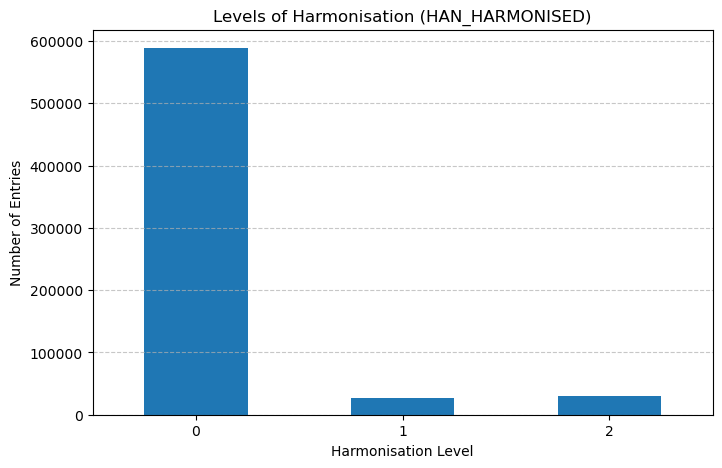

In [38]:
import matplotlib.pyplot as plt
harmonisation_counts = results_han['han_harmonized'].value_counts().sort_index()

# Create the bar plot
plt.figure(figsize=(8, 5))
harmonisation_counts.plot(kind='bar')
plt.title('Levels of Harmonisation (HAN_HARMONISED)')
plt.xlabel('Harmonisation Level')
plt.ylabel('Number of Entries')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Different Name Variations

A filter can be used to focus for example on records where the harmonised name matches "GENERAL ELECT CO." but have a different original name before harmonisation. 

In [39]:
ge_variants_query = db.query(
    TLS206_PERSON.person_name,      
    TLS206_PERSON.han_name,   
            
).filter(
    TLS206_PERSON.han_name == 'GENERAL ELECT CO'  # Filter for harmonized name "General Electric"
).group_by(
    TLS206_PERSON.person_name,
    TLS206_PERSON.han_name,
    TLS206_PERSON.han_id
)

ge_variants_res = patstat.df(ge_variants_query)

ge_variants_res

,person_name,han_name
0,GENERAL ELECTRIC COMPANY,GENERAL ELECT CO
1,General Electric Company,GENERAL ELECT CO
2,General Electric Co.,GENERAL ELECT CO
3,General Electronic Company,GENERAL ELECT CO
4,GENERAL ELECTRIC COMPANY.,GENERAL ELECT CO
5,GENERAL ELECTRONIC COMPANY,GENERAL ELECT CO
6,"GENERAL ELECTRIC CO.,",GENERAL ELECT CO
7,"GENERAL ELECTRIC COMPANY,",GENERAL ELECT CO


By listing all original person names that have been standardized to "GENERAL ELECT CO", one can track how **different name variations** have been unified under one harmonized identifier. This is useful in ensuring consistency and **avoiding duplication** when analyzing patent data involving large entities like General Electric.